# Задание

Решить задачу Коши: 
\begin{cases}
y' = x^3 +y, 
\\
y(1) = 0
\\
x \in [1,2]
\end{cases}

Методами: 
1. Эйлера
2. Рунге-Кутта четвертого порядка
3. Адамса

# Решение

## Импорт необходимых библиотек 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict
import pandas as pd

## Начальные условия и необходимые функции 

In [16]:
# y' = x^3 + y
def f(x, y):
    return x**3 + y

In [40]:
# отрисовка получившихся значений
def plot(df):
    plt.plot(df["x"], df["y"], '-bo')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xticks(np.arange(1, 2+h, h))
    plt.grid(True)

In [33]:
# x c [1; 2]
x0 = 1
b = 2

# y(1) = 0
y0 = 0 

In [34]:
h = (b - x0) / 10
h

0.1

## 1. Метод Эйлера

In [35]:
euler = defaultdict(list)

In [36]:
euler["x"].append(x0)
euler["y"].append(y0)

In [37]:
x = x0

while x <= b:
    x = euler["x"][-1]
    y = euler["y"][-1]
    
    y = y + f(x, y) * h
    x = x + h
    
    euler["x"].append(x)
    euler["y"].append(y)

In [38]:
edf = pd.DataFrame(euler)
edf

,x,y
0,1.0,0.000000
1,1.1,0.100000
2,1.2,0.243100
3,1.3,0.440210
4,1.4,0.703931
5,1.5,1.048724
6,1.6,1.491097
7,1.7,2.049806
8,1.8,2.746087
9,1.9,3.603895


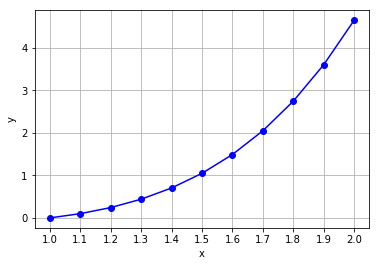

In [41]:
plot(euler)

## 2. Метод Рунге-Кутта четвертого порядка

In [69]:
runge = defaultdict(list)

In [70]:
runge["x"].append(x0)
runge["y"].append(y0)

In [71]:
x = x0

while x <= b:
    x = runge["x"][-1]
    y = runge["y"][-1]
    
    k0 = f(x, y)
    k1 = f(x + h/2, y + h*(k0/2))
    k2 = f(x + h/2, y + h*(k1/2))
    k3 = f(x+h, y + h*k2)
    
    y = y + h * ( (k0 + 2*(k1+k2) + k3)/6 )
    x = x + h
    
    runge["x"].append(x)
    runge["y"].append(y)

In [72]:
rdf = pd.DataFrame(runge)
rdf

,x,y
0,1.0,0.000000
1,1.1,0.121734
2,1.2,0.294443
3,1.3,0.530740
4,1.4,0.845193
5,1.5,1.254537
6,1.6,1.777897
7,1.7,2.437038
8,1.8,3.256647
9,1.9,4.264640


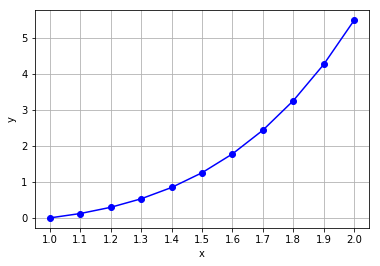

In [73]:
plot(rdf)

## 3. Метод Адамса

In [88]:
adams = defaultdict(list)

In [89]:
adams["x"].append(x0)
adams["y"].append(y0)

In [90]:
for i in range(4):
    x = adams["x"][-1]
    y = adams["y"][-1]
    
    k0 = f(x, y)
    k1 = f(x + h/2, y + h*(k0/2))
    k2 = f(x + h/2, y + h*(k1/2))
    k3 = f(x+h, y + h*k2)
    
    y = y + h * ( (k0 + 2*(k1+k2) + k3)/6 )
    x = x + h
    
    adams["x"].append(x)
    adams["y"].append(y)

In [91]:
for i in range(4,10):
    x = adams["x"][-1]
    y = adams["y"][-1]
    
    a1 = f(x, adams["y"][i - 1]) - f(x - h, adams["y"][i - 2])
    a2 = f(x, adams["y"][i - 1]) - 2 * f(x - h, adams["y"][i - 2]) + f(x - 2*h, adams["y"][i - 3])
    a3 = f(x, adams["y"][i - 1]) - 3 * f(x - h, adams["y"][i - 2]) + \
         3 * f(x - 2*h, adams["y"][i - 3]) - f(x - 3*h, adams["y"][i - 4])
    
    y = y + h * f(x, adams["y"][i - 1]) + a1*( (h**2)/2 ) + 5*a2*( (h**3)/12 ) + 3*a3*( (h**4)/8 );
    x = x + h
    
    adams["x"].append(x)
    adams["y"].append(y)

In [92]:
adf = pd.DataFrame(adams)
adf

,x,y
0,1.0,0.000000
1,1.1,0.121734
2,1.2,0.294443
3,1.3,0.530740
4,1.4,0.845193
5,1.5,1.176643
6,1.6,1.603458
7,1.7,2.136027
8,1.8,2.793975
9,1.9,3.598123


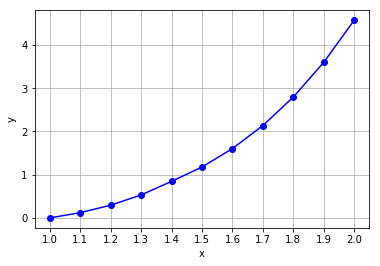

In [93]:
plot(adf)

## Сравнение графиков 

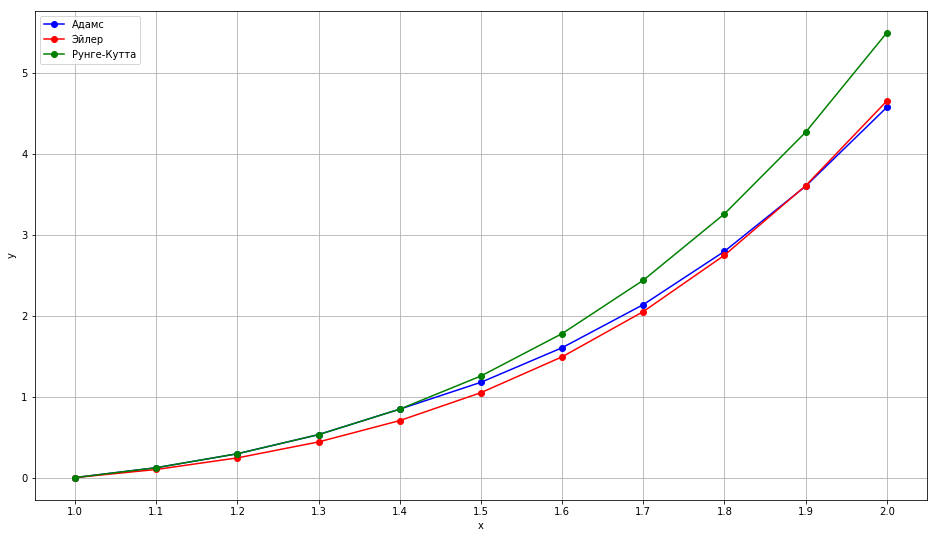

In [103]:
plt.figure(figsize=(16,9))

plt.plot(adf['x'], adf['y'], "-bo",label="Адамс", color="b")
plt.plot(edf['x'], edf['y'], "-bo",label="Эйлер", color="r")
plt.plot(rdf['x'], rdf['y'], "-bo",label="Рунге-Кутта", color="g")


plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(1, 2+h, h))
plt.grid(True)
plt.legend();

In [104]:
true_x = np.arange(x0, b+, h)
true_x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])